In [ ]:
#To implement a topic modelling approach for classifying the documents into 7 different topics, 
#we can use a combination of text pre-processing, feature extraction, and machine learning (ML) algorithms.
#Here are two different versions of the topic labeller that we can use:

#Approcach1: Bag-of-Words (BoW), ngrams and Support Vector Machine (SVM)
#In this version, I will use the BoW approach for feature extraction and an SVM classifier for classification.
   
    #Steps:
    #1Load the dataset and split it into training (70%) and testing (30%)
    #2Preprocess the text data by converting them to lowercase, removing stop words, and stemming the remaining words using NLTK.
    #3Use the BoW approach with the desired range of n-grams to convert the preprocessed text data into numerical vectors.
    #4Apply the TfidfTransformer to the numerical vectors to transform them into TF-IDF representations.
    #5Train an SVM classifier on the training data using the numerical vectors obtained from BoW.
    #6Test the SVM classifier on the testing data and evaluate the performance of the topic labeller using metrics such as accuracy, precision, recall, and F1 score.

    
#Approach2: The second approach involves using TF-IDF (Term Frequency-Inverse Document Frequency) 
#and a Random Forest Classifier to classify documents into 7 different topics.
    #STEPS:
    #1Set up the directories where the folders of texts are located and define the topic labels.
    #2Load the texts and their corresponding topic labels from the folders.
    #3Split the data into training and testing sets.
    #4Preprocess the text data, which may involve converting to lowercase, removing stopwords, and any additional cleaning or normalization steps.
    #5Convert the preprocessed text data into numerical vectors using TF-IDF. 
    #TF-IDF assigns weights to each word in the document based on its frequency in the document and 
    #its inverse frequency across all documents.
    #6Train a Random Forest classifier on the TF-IDF vectors. 
    #Random Forest is an ensemble learning method that combines multiple decision trees to make predictions.
    #7Test the Random Forest classifier on the testing data and evaluate its performance
    #using metrics such as accuracy, precision, recall, and F1 score.
    

In [7]:
# Import necessary libraries
import os
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

# Set up directories and topic labels
directory = "/Users/ejbeazleigh/Downloads/Assessment2Data/data_for_topic_labelling"
topics = ['accounts', 'biology', 'geography', 'history', 'maths', 'physics', 'software']

# Set up stemmer and stop words
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

# Create empty lists for storing documents and their labels
documents = []
labels = []

# Load documents and labels from each subfolder in dataset directory
for topic in topics:
    subdirectory = os.path.join(directory, topic)
    files = os.listdir(subdirectory)
    for file in files:
        with open(os.path.join(subdirectory, file), 'r', encoding='utf-8') as f:
            text = f.read()
            # Preprocess the text data
            text = text.lower()
            words = text.split()
            words = [stemmer.stem(word) for word in words if word not in stop_words]
            text = ' '.join(words)
            documents.append(text)
            labels.append(topic)

# Combine documents and labels into tuples and shuffle them to avoid overfitting
data = list(zip(documents, labels))
random.shuffle(data)
documents, labels = zip(*data)

print("preprocessing done ed")



preprocessing done ed


In [8]:
# Split data into training and testing sets
train_size = int(len(documents) * 0.7)
train_documents = documents[:train_size]
train_labels = labels[:train_size]
test_documents = documents[train_size:]
test_labels = labels[train_size:]

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Step 3: Convert the preprocessed text data into numerical vectors using BoW
vectorizer = CountVectorizer(ngram_range=(1, 2))  # Specify the desired range of n-grams
X_train = vectorizer.fit_transform(train_documents)
X_test = vectorizer.transform(test_documents)

# Apply the TfidfTransformer to the numerical vectors
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_test_tfidf = tfidf_transformer.transform(X_test)



In [9]:
# Train the SVM classifier on the training data
svm_classifier = LinearSVC()
svm_classifier.fit(X_train_tfidf, train_labels)

# Test the SVM classifier on the testing data
predicted_labels = svm_classifier.predict(X_test_tfidf)

In [10]:
#contextually for this assignment the TEST LABELS represent (=) the GROUND TRUTH
# Calculate performance metrics and generate confusion matrix
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='macro')
recall = recall_score(test_labels, predicted_labels, average='macro')
f1 = f1_score(test_labels, predicted_labels, average='macro')
confusion = confusion_matrix(test_labels, predicted_labels, labels=topics)

print("Confusion matrix:")
print(confusion)

Confusion matrix:
[[ 74   0   0   0   0   0   0]
 [  0 174   0   0   0   1   0]
 [  0   6  23   1   0   1   0]
 [  0   7   0 155   0   0   0]
 [  0   0   0   0  51   0   0]
 [  0   0   0   0   0 250   0]
 [  0   1   0   1   0   0 198]]


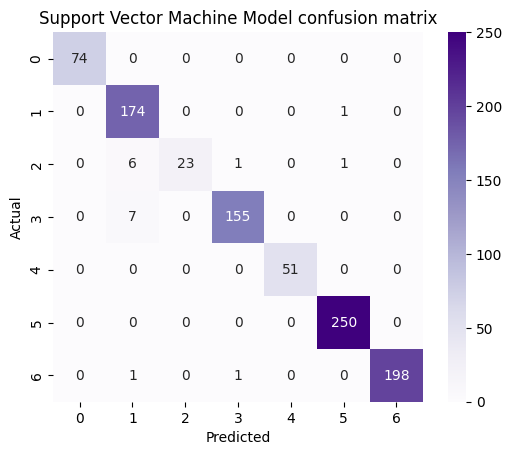

<Figure size 640x480 with 0 Axes>

Accuracy: 0.9809119830328739
Precision: 0.9864080790648464
Recall: 0.9547159030876389
F1 score: 0.9676153117549863


In [11]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix 
import seaborn as sns


ax = plt.axes()
sns.heatmap(confusion,ax=ax,annot=True,fmt='g',cmap='Purples',square=True)
fig = plt.figure()
fig.patch.set_facecolor('xkcd:grey')
ax.set_title('Support Vector Machine Model confusion matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

In [ ]:
#######################APPROACH TWO#################################

In [12]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Set up directories and topic labels
directory = "/Users/ejbeazleigh/Downloads/Assessment2Data/data_for_topic_labelling"
topics = ['accounts', 'biology', 'geography', 'history', 'maths', 'physics', 'software']

# Step 2: Load the texts and their corresponding topic labels
texts = []
labels = []
for topic in topics:
    topic_directory = os.path.join(directory, topic)
    file_names = os.listdir(topic_directory)
    for file_name in file_names:
        file_path = os.path.join(topic_directory, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            texts.append(text)
            labels.append(topic)

In [13]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.3, random_state=42)

# Step 4: Preprocess the text data and convert to numerical vectors using TF-IDF
vectorizer = TfidfVectorizer()  # You can specify additional parameters for TF-IDF vectorization
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [14]:
# Step 5: Train a Random Forest classifier on the TF-IDF vectors
classifier = RandomForestClassifier(n_estimators=100)  # You can specify additional parameters for the Random Forest classifier
classifier.fit(X_train_tfidf, y_train)

# Step 6: Test the Random Forest classifier and evaluate performance
y_pred = classifier.predict(X_test_tfidf)

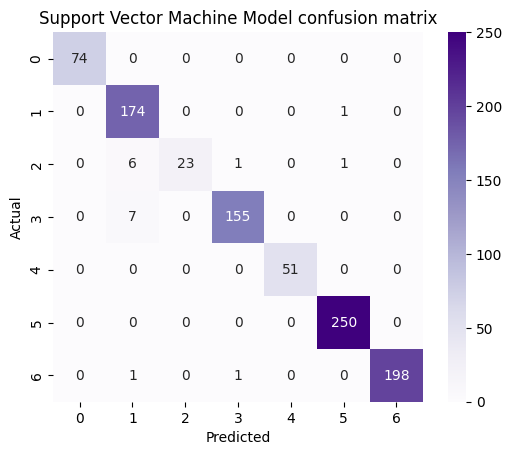

<Figure size 640x480 with 0 Axes>

Accuracy: 0.9650053022269353
Precision: 0.97512772096494
Recall: 0.8619105761962904
F1 score: 0.8680925088996824


In [15]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix 
import seaborn as sns


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
confusion = confusion_matrix(test_labels, predicted_labels, labels=topics)

ax = plt.axes()
sns.heatmap(confusion,ax=ax,annot=True,fmt='g',cmap='Purples',square=True)
fig = plt.figure()
fig.patch.set_facecolor('xkcd:grey')
ax.set_title('Support Vector Machine Model confusion matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)